## Basic relationship plots

Last time, we played around with plotting the distributions of variables, and comparing distributions to one another. Oftentimes, however two variables intimately related such that knowing a particular value of one variable allows you to predict, to some extent, the value of another variable. Say for example, two variables measured in the same sample or the same human individual. In cases where the values of two variables are interrelated, simply plotting the historgrams of each variable would not show the relationship. To show the relationship, we would want instead to plot the values of one variable against the values of the other. This plot (a.k.a. scatter plot) is best way to begin to appreciate the nature and strength of the relationship. So let's play around with plotting and evaluation some relationships.

##### As always, we'll start by importing the libraries we'll use.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### And read the first of our data files

In [4]:
mdff = pd.read_csv("datasets/008TutorialDataFile1.csv")

##### Now let's take a look to make sure we read something that looks okay

Make sure you have read the instructions. As in the previous tutorials, we will assume that you will have imported the dataset under `./datasets`.

In [5]:
display(mdff)

,X,Y
0,0.100000,274.608664
1,0.310553,235.391417
2,0.521106,241.092965
3,0.731658,264.568801
4,0.942211,197.304517
...,...,...
195,41.157789,458.805412
196,41.368342,419.435665
197,41.578894,423.102998
198,41.789447,444.141966


#### We can now plot on varial (`X`) against the other (`Y`) to so visually appreciate their relationship.
We can simply do this by using the built in plotting capability of the data frame created in `Cell [3]` when we loaded the dataset.

<AxesSubplot:xlabel='X', ylabel='Y'>

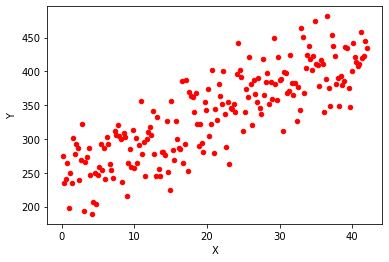

In [6]:
mdff.plot(x='X', y='Y', kind='scatter', color='r')

OK, it looks like the two columns of the dataset we loaded, the variables `x` and `y`, are related. This can be interpreted as if the measurements in each row of the dataset have some sort of relationship.

The plot shows the relationship. The relationship looks like a straight line in which `y` is related to `x` by `y = a + bx + err`, in which `a` is the y-intercept, `b` is the slope, and *`err`* represents 'error' or 'noise', that is, variablility in `y` that is unrelated to `x`. 

So, in a nutshell, it looks like if we know the value of `x`, we can predict the value of `y` except for a some amount of random variable represented by `err`. And all we need to know to do the predicting is two numbers, a slope and a y intercept.

Now lets do a prettier plot using `seaborn`.

In [7]:
sns.set_theme() # set theme to seaborn's default

Just like `displot()` is the seaborn quick and easy way for plotting distributions of variables, `relplot()` is the Q&E way for plotting relationships among variables. 

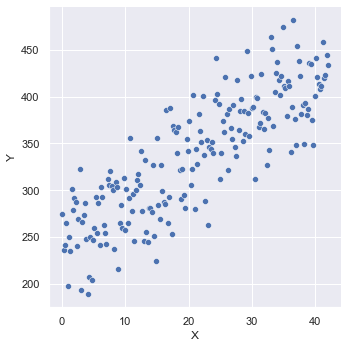

In [8]:
sns.relplot(data=mdff, x='X', y='Y')

As we noted above, the data seem to fall around a roughly straight line. We can easily fit and plot that line using the `seaborn.lmplot()` function, where the `lm` in the call stands for "linear model" (of which a straight line is the simplest and default case).

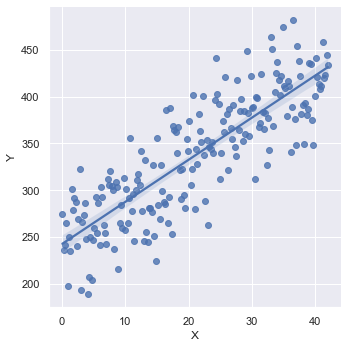

In [9]:
sns.lmplot(data=mdff, x='X', y='Y')

So what happened here. In this plot, there is a straight line plotted along with the data. The `slope` and `y-intercept` of the line have been adjusted by the `lm` modelling method of `seaborn` so that the line does the best job at simultaneously coming the closest to all the data points. More specifically, the line shown is the line that minimizes the *sum of the squared differences between the line and the y data values*. 

This *sum of squared difference* between the line and the data points is also called *error*, because it represents the remaining difference between individual points and the linear model. It represents what is not accounted for by the model (the line) as as such is  considered error of the linear model. This error is generally referred to as the *sum squared error* or just the *sse*. 

The plot also shows the error bound around the fit. The error bound is represented as a semi-transparent shading around the line in the previous plot. The shading shows the uncertainty of the model. More specifcally, by assuming that the two samples (`x` and `y`) are representative of some underlying populations, or more generally of the underlying phenomena, if we were to obtain other samples from the same underlying populations that are producing the data, then 95% of experiments would produce data that would fit a straight line somewhere within these bounds. 

There are two main things we can take away from this plot. First, there is a relationship between the variables, and the data nail down that relationship very well (as indicated by the small error bounds).

Second, there is noise – random variability – that limits our ability to predict *any one particular* y value from a give x value. 

We can estimate the `slope` (or `b` in the equation above) and `y` intercept (or `a` in the equation above) of the straight line relationship with `numpy.polyfit()` as follows:

In [10]:
myfit = np.polyfit(x=mdff['X'], y=mdff['Y'], deg=1)
print(myfit)

[  4.50987413 242.13206112]


The `deg=1` argument specifies that we want to fit the data with a *first order polynomial*, i.e., a straight line. The returned coefficients tell us that the `slope` is around 4.5 and the `y intercept` is around 240. But, of course, these numbers only allow to predict `y` *on average*. There is also the `error`, which puts a fundamental limit on our ability to predict any particular `y` value.

We can explore the error a little more by looking at the *residuals*, which is just the difference (literally) between the line and the `y` values. 

Seaborn provides an easy way to peek at the rediduals using `seaborn.residplot()`.

<AxesSubplot:xlabel='X', ylabel='Y'>

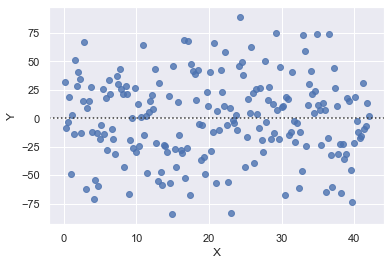

In [11]:
sns.residplot(data=mdff, x='X', y='Y')

We can think of this as a picture of the noise alone; we have literally subtracted out the linear relationship with x! That means that for each value in `x` we have subtracted the value in `y` withg the corresponding value of the line. Let's think about it, in theory, if things go well with the model, meaning the line captures the data well then the subtraction should produce about half of the points above `0` and half below `0`. This is because if the model is good, unbiased then half of the `y` values should end up above the line and half below; this is because the line is supposed to pass right in the middle of the data! As we can see from the plot the distribution of the data is symmetric around `0`, and it is appears that half of the data points are above and half below `0`. 

After that we can look at the range or spread of the residuals. If we think that the model is a good one, the residuls should be small. This would indicate that the line is generally close to each data point. If the line were to be far from each datapoint then the line would not be very representative of the dataset and the residuals would spread across a wide range of values. A small or large spread (or range of values) of the residuals is indicative of the quality of the fit of the model. 

In our case, the plot shows that the range of the noise looks to be around 200 total in the `y` direction. If the variability is Gaussian, this would correspond to a standard deviation of around 200/6 or 33 (do you see why we divided by 6?). So we can say that we can predict y *on average* with a precision corresponding to a sigma of about +/- 33.

Let's explore this a little further by looking at the actual distribution of the residuals. In other words, lets look at the distribution of the noise component of `y`. We can do this by first getting the actual values of our best fit line at each value of `x` using `np.polyval()` – we just give it our fit from `np.polyfit()` and our x values.

In [13]:
fitvals = np.polyval(myfit, mdff['X'])

Now that we have those, we can compute the residual values by subtracting the best fit line from the y values.

In [14]:
myres = mdff['Y'] - fitvals

And then plotting those!

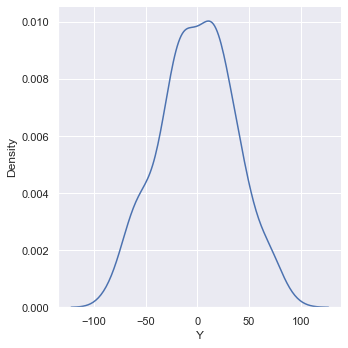

In [15]:
sns.displot(myres, kind='kde')

Sure enough, looks like a Gaussian distribution with a standard deviation of around 30 or so. Or, more precisely:

In [16]:
np.std(myres)

35.9227913743059

Okay, so, what have we done? We have looked at the data and then created a simple model in which `y` is a linear function of `x` plus random variability. If we let *N*(mu, sigma) stand for a normal distribution with a mean of mu and a standard deviation of sigma, the we can actually write down our as

 *y = 4.5 * x + 242 + N(0, 36)*

Even though this is a simple line fit, the basic procedure we just followed is a general procedura that scientists and data scientists always use (or should use) when presented with a new dataset to explore and model. The procedure is the same no matter how complicated a situation or dataset we are dealing with:

1. look at the data
2. make a guess at the relationship (perhaps using prior knowledge in addition to the data, start with something simple, say a linear relationship)
3. fit a model to the data
4. evaluate how well the model fits the data (look at the error and residuals)

Sometimes these steps are informal and internal (Oh, yeah, that's linear), and sometimes we go way down into the weeds in the fitting and evaluation, but these are the basic steps!

##### Let's look at a second set of data!

In [17]:
mdff = pd.read_csv("datasets/008TutorialDataFile2.csv")

Take a peek:

In [18]:
display(mdff)

,X,Y
0,3.353062,2.453846
1,4.871934,1.586254
2,6.220546,1.626260
3,4.086313,2.001541
4,4.806622,2.138675
...,...,...
95,3.966096,1.685230
96,6.706995,2.422260
97,5.650075,2.224024
98,5.077873,1.706203


Plot the relationship!

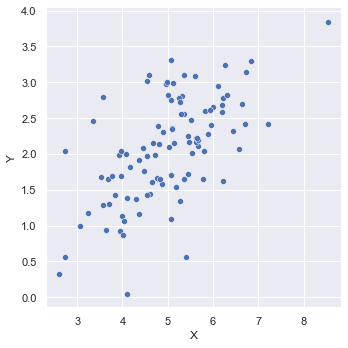

In [19]:
sns.relplot(data=mdff, x='X', y='Y')

So these data look both the same and different than the last data set. They look the same in that it looks like there is a linear relationship between x and y. Let's look at that.

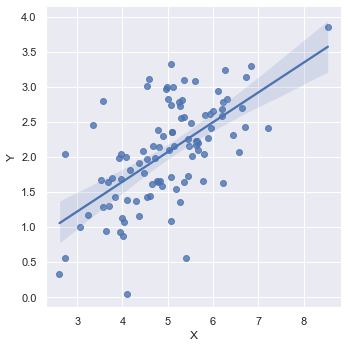

In [20]:
sns.lmplot(data=mdff, x='X', y='Y')

So it looks like we have a nice linear relationship as before, but the slope is perhaps not pinned down as well (note the bow tie shape of the error bounds). Cool.

But these data also look different if we look at the x values. In the last data set, the x values were evenly spaced, as though they came from a laboratory experiment in which x was intentionally adjusted in a precise way. In this data set, it looks as though x, like y, was randomly sampled.

So let's plot these data in some ways that we can look at both x and y by making a scatterplot and then adding a "rug" plot along the axes.

<AxesSubplot:xlabel='X', ylabel='Y'>

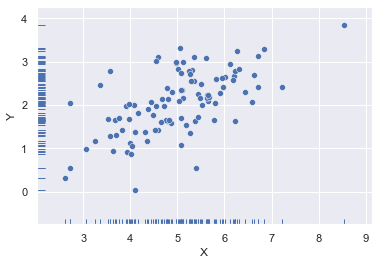

In [21]:
sns.scatterplot(data=mdff, x='X', y='Y')
sns.rugplot(data=mdff, x='X', y='Y')

The rugs are basically interior tic marks showing the positions of each data point close to the corresponding axis. Here, we can see that both variables cluster near the centers and get more sparse towards the edges of the plot.

Because both x and y seem to be random variables, the scatter plot above shows the *joint distribution* of x and y. We can take a more detailed look by plotting both the joint distribution, and the individual or *marginal* distributions of the two variables in the *margins* of the plot. 

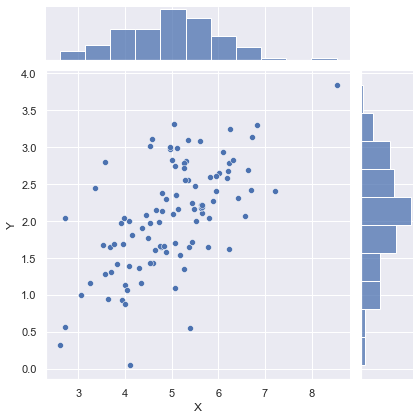

In [22]:
sns.jointplot(x="X", y="Y", data=mdff)

Oh! That's pretty! And we can see at a glance that each variable is distributed roughly as Gaussians as well as seeing the y vs. x relationship. We can also make a version with the best fit line by specifying the `kind` argument to `reg` for regression.

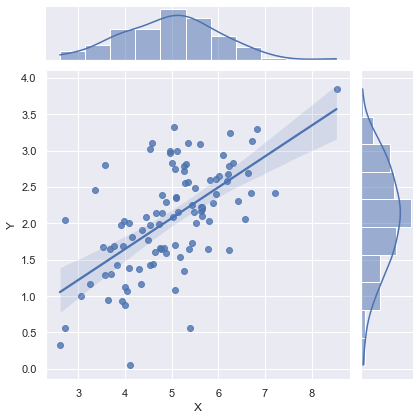

In [23]:
sns.jointplot(x="X", y="Y", data=mdff, kind="reg")

As a bonus, this also seems to add KDE plots to the marginal distributions!

So, looking at these data, we'd conclude that there is a positive linear relationship between x and y, though both variables are noisy. If we wished, we could of course do a deeper dive into a linear model and how well it fits!

##### Let's look at our third and final dataset.

In [24]:
mdff = pd.read_csv("datasets/008TutorialDataFile3.csv")
display(mdff)

,X,Y
0,0.100000,-42.297551
1,0.310553,151.497704
2,0.521106,68.200382
3,0.731658,71.047752
4,0.942211,-89.430861
...,...,...
195,41.157789,1063.004451
196,41.368342,1036.558676
197,41.578894,1198.886853
198,41.789447,1147.630694


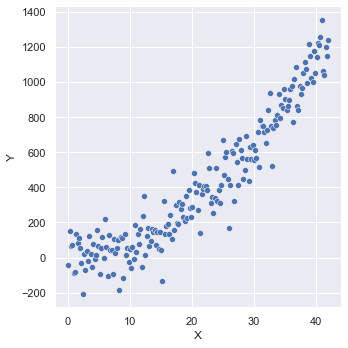

In [25]:
sns.relplot(data=mdff, x='X', y='Y')

So, again, we have a strong relationship. Let's do our plot with a simple model:

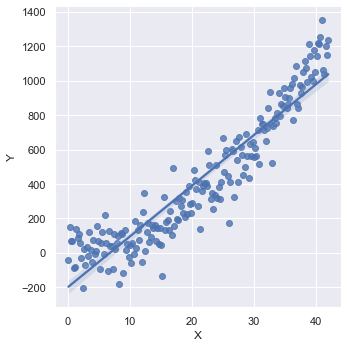

In [26]:
sns.lmplot(data=mdff, x='X', y='Y')

The simple line fit looks okay, and the error bounds on the line are small. Great! Right!

If we look a little more closely at the actual data though, without getting seduced by the line, we see that the relationship here is perhaps a little more complicated. In addition to y going up with x, it looks like there's a curve in the data such that, the higher x is, the faster y increases.

Let's look at the residuals from our line fit.

<AxesSubplot:xlabel='X', ylabel='Y'>

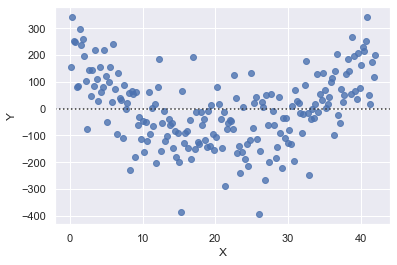

In [27]:
sns.residplot(data=mdff, x='X', y='Y')

Here we can clearly see that there is a *pattern to the residuals*. The residuals do not look like how expected, meaning they are not centered around zero or randoml distributed around zero. There is a shape, a banana shape we would say. This is diagnostic. In general, true error, true random variability tends to be normally distributed (thank you Central Limit Theorem). Thus, if our model is really capturing the data, then the residuals should be flat and normally distributed around zero (think about it). So this "smile" pattern in the data is because our model is systematically overestimating the data in the middle and underestimating at the two extremes.

It looks like the data are bending but our model isn't.

We'll talk about different kinds of models as we go on, but a very simple way to capture a bend in data is to expand our *first degree polynomial* model – a straight line – to a *second order polynomial* in which

 *y = a + bx + cx^2 + N(0,1)*

 The squared term turns our carrot model into a banana model. Let's look!

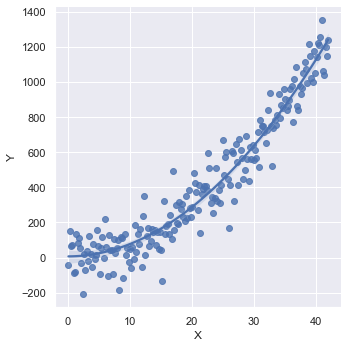

In [28]:
sns.lmplot(data=mdff, x='X', y='Y', order=2)

Note the `order=2` argument in `lmplot()`

You might be thinking "Wait, didn't `lm` stand for *linear model*?" But now we're squaring x, doesn't that make it non-linear"? Indeed, all polynomials are actually linear models by definition – not all lines are straight!

Let's look at the residuals again!

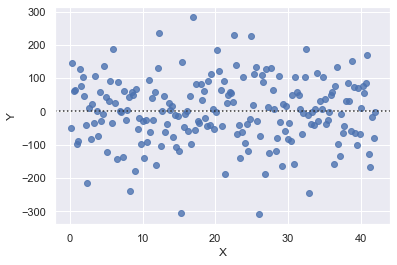

In [29]:
g = sns.residplot(data=mdff, x='X', y='Y', order=2)

Okay, that looks good now! But let's go ahead and take a slightly deeper dive like we did above, but without the color commentary.

In [30]:
myfit = np.polyfit(x=mdff['X'], y=mdff['Y'], deg=2)
print(myfit)

[0.6987571  0.01960354 7.26458072]


In [31]:
fitvals = np.polyval(myfit, mdff['X'])

In [32]:
myres = mdff['Y'] - fitvals

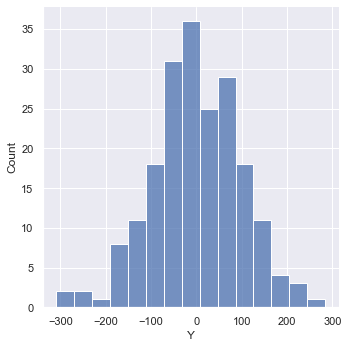

In [33]:
sns.displot(myres)

In [34]:
np.std(myres)

98.00145770988048

So now we can say that the residuals now look like truly random noise, and that the data are captured by

 *y = 7.3 + 0.02x + 0.7x^2 + N(0,98)*
 

So, here, we played all the same games that we talked about above. The difference is that we tried a candidate model, a straight line, decided it wasn't quite right, and then settled on a curvy model instead.

Now, as you might have realized already, the models we played with in this tutorial, were purely *descriptive*. We don't know what `x` and `y` are, and can't therefore say anything about *why* `y` should be related to `x`. Ultimately, we want models that represent the things that are generating the data, not just ones that reasonably describe the data.

Ultimately, though, the basic process of fitting and evaluation are the same, so this tutorial gives us a good start!